In [ ]:
#import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset

In [4]:
df=pd.read_csv('netflix_titles.csv')

In [ ]:
#display the first few rows

In [5]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
## Display basic information about the dataset

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
#Data Cleaning

In [ ]:
#Check for missing values

In [7]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
#Handle the missing values ( filling the null values with "unknown")

In [9]:
df['director'].fillna('Unknown',inplace=True)

In [10]:
df['cast'].fillna('Unknown',inplace= True)

In [26]:
df['country'].fillna('Unknown',inplace=True)

In [28]:
df['date_added'].fillna('Unknown',inplace=True)

In [ ]:
# Convert 'date_added' to datetime

In [ ]:
#examine the date_added column

In [13]:
print(df['date_added'].head(10))
print(df['date_added'].tail(10))

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
5    September 24, 2021
6    September 24, 2021
7    September 24, 2021
8    September 24, 2021
9    September 24, 2021
Name: date_added, dtype: object
8797    September 13, 2018
8798     December 31, 2019
8799     February 15, 2018
8800     December 15, 2016
8801         March 9, 2016
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, dtype: object


In [ ]:
#remove the leading/trailing whitespace

In [14]:
df['date_added'] = df['date_added'].str.strip()

In [ ]:
#convert the type of date_added to datetime with error handling;errors='coerce' parameter will replace any values that can't be parsed with NaT (Not a Time).

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

In [ ]:
#Check for any NaT values.This will show you how many dates couldn't be parsed.

In [16]:
print(df['date_added'].isna().sum())

10


In [ ]:
#NaT values

In [17]:
problematic_dates = df[df['date_added'].isna()]['date_added']
print(problematic_dates)

6066   NaT
6174   NaT
6795   NaT
6806   NaT
6901   NaT
7196   NaT
7254   NaT
7406   NaT
7847   NaT
8182   NaT
Name: date_added, dtype: datetime64[ns]


In [ ]:
#checking for any duplicate values after cleaning

In [18]:
print(df.duplicated().sum())

0


In [ ]:
# Check unique values in a categorical column

In [19]:
print(df['type'].unique())

['Movie' 'TV Show']


In [ ]:
# Correcting inconsistent data

In [20]:
df['type'] = df['type'].replace('TV Show', 'TV Shows')

In [21]:
df['type'] = df['type'].replace('Movie', 'Movies')

In [ ]:
# Check for outliers in a numerical column (e.g., 'release_year')

In [22]:
print(df['release_year'].describe())

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


In [ ]:
# Remove outliers: removing entries before 1900)

In [23]:
df = df[df['release_year'] >= 1900]

In [ ]:
#verifying cleaning

In [ ]:
# Check missing values again

In [34]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64


In [ ]:
#Exploratory Data Analysis

In [ ]:
#content distributions

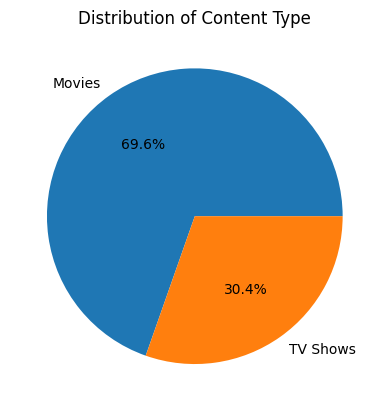

In [31]:
content_distribution = df['type'].value_counts()
plt.pie(content_distribution, labels=content_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Content Type')
plt.show()

In [ ]:
# Top 10 countries producing content

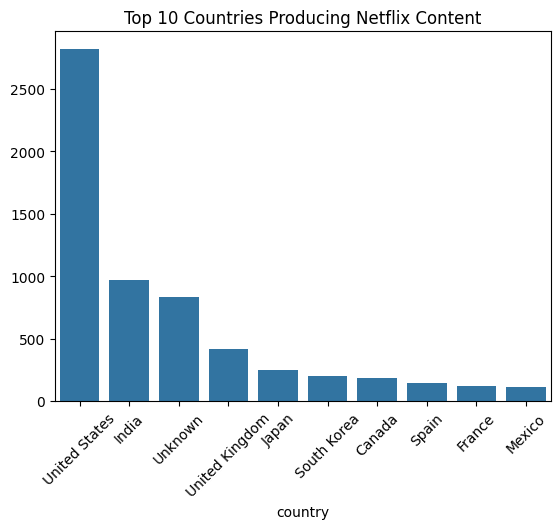

In [33]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Trend of content addition over years

In [36]:
print(df['date_added'].dtype)

object


In [37]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

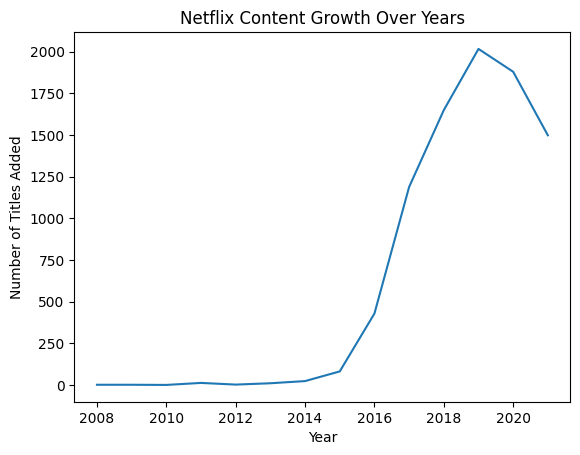

In [38]:
df['year_added'] = df['date_added'].dt.year
content_growth = df.groupby('year_added')['show_id'].count()
plt.plot(content_growth.index, content_growth.values)
plt.title('Netflix Content Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

In [ ]:
# Distribution of content ratings

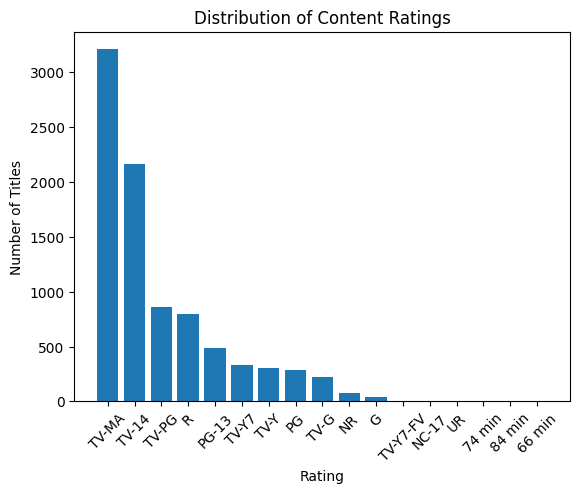

In [39]:
rating_distribution = df['rating'].value_counts()
plt.bar(rating_distribution.index, rating_distribution.values)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Most common genres


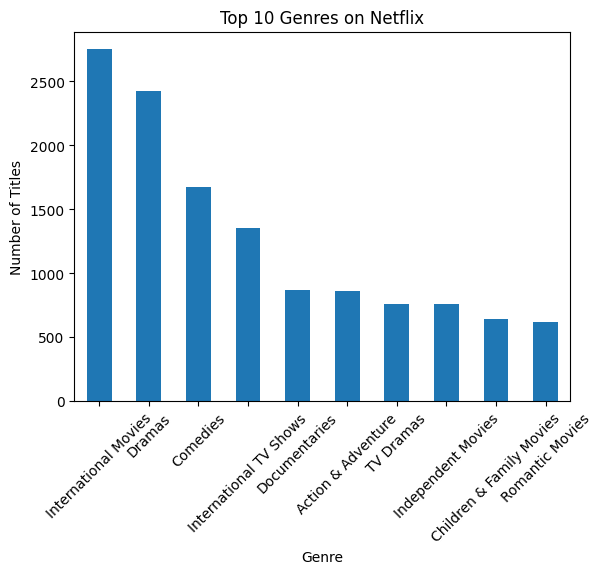

In [40]:
df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert release_year to datetime

In [48]:
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

In [ ]:
# Content by release year

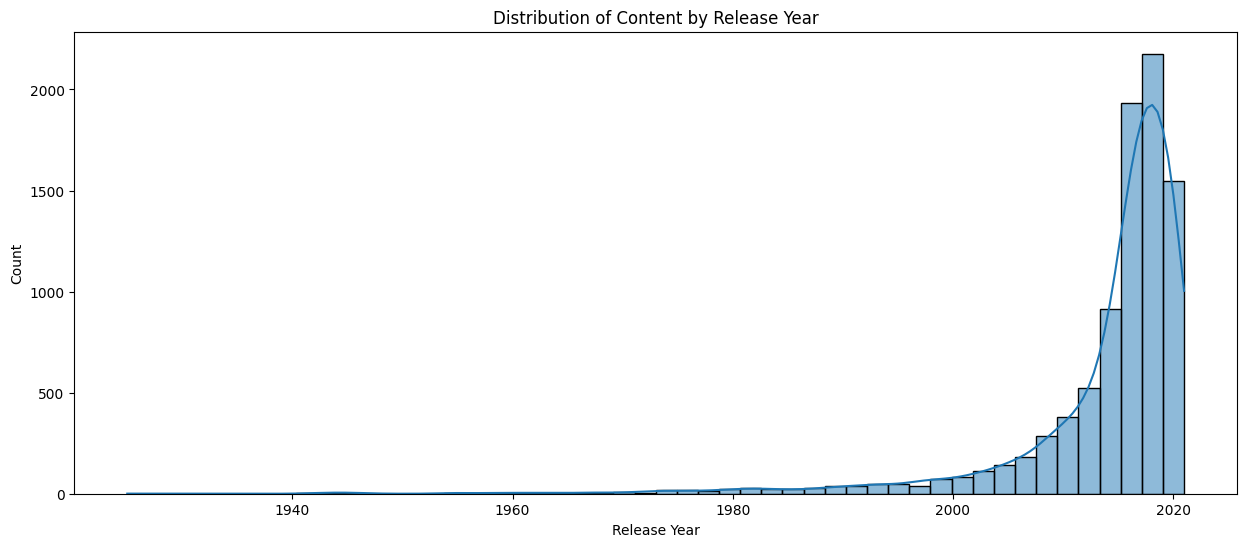

In [49]:
plt.figure(figsize=(15, 6))
sns.histplot(df['release_year'], bins=50, kde=True)
plt.title('Distribution of Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# Average release year by type

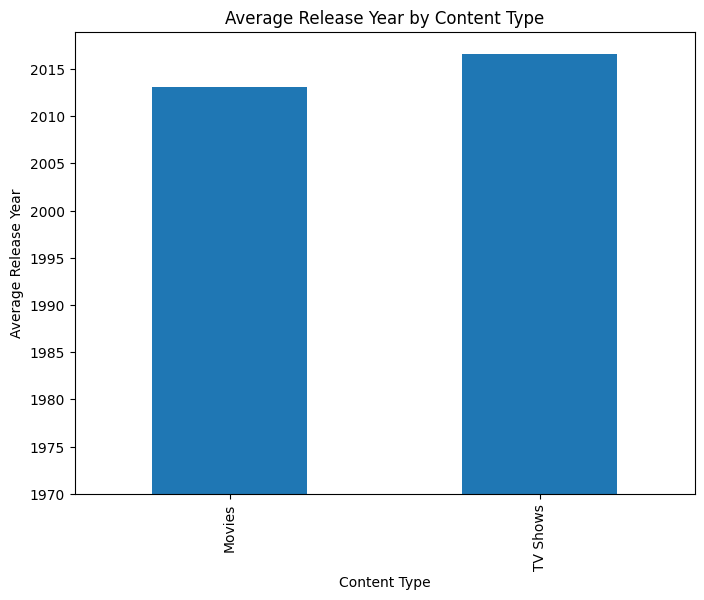

In [50]:
avg_release_year = df.groupby('type')['release_year'].mean()
plt.figure(figsize=(8, 6))
avg_release_year.plot(kind='bar')
plt.title('Average Release Year by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Release Year')
plt.show()

In [ ]:
Director Analysis:

In [ ]:
# Top 10 directors by number of titles

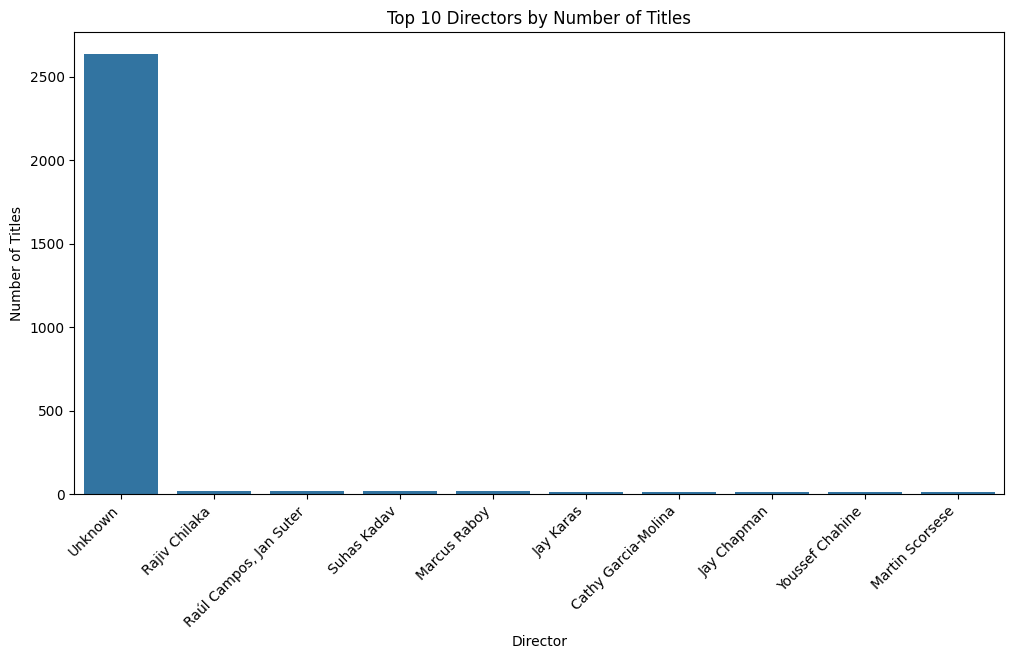

In [51]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
Content Addition by Month:

In [ ]:
# Ensure date_added is in datetime format

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [ ]:
# Content addition by month

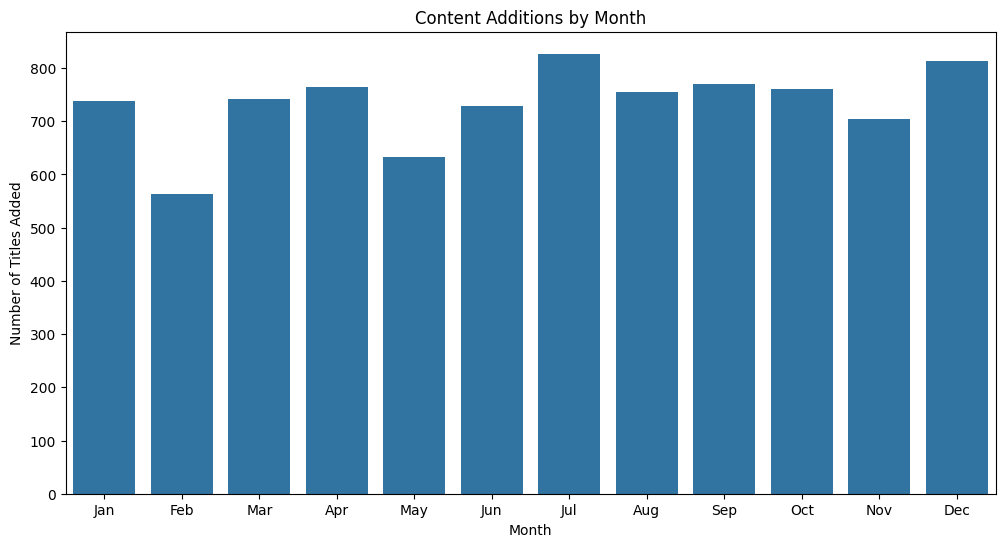

In [52]:
df['month_added'] = df['date_added'].dt.month
monthly_additions = df['month_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values)
plt.title('Content Additions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()